In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/mmoli/GA/projects/group_project/data/new_cleaned/all_cleaned.csv')

In [5]:
death_rate_ambient = pd.read_csv('C:/Users/mmoli/GA/projects/group_project/data/added_data/death-rate-by-source-from-air-pollution.csv')

In [11]:
death_rate_ambient = death_rate_ambient.drop(columns='Code')

death_rate_ambient = death_rate_ambient[death_rate_ambient['Year']<=2014]

death_rate_ambient.rename(columns={'Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)': 'Death_rate_ambient_ozone_pol',
                                  'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)': 'Death_rate_household_air_pol',
                                  'Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)': 'Death_rate_all_causes'}, inplace=True)

df = pd.merge(df, death_rate_ambient, on=['Year', 'Entity'])
df = df.loc[:,~df.columns.duplicated()]

In [13]:
death_actual_pollution = pd.read_csv('C:/Users/mmoli/GA/projects/group_project/data/added_data/deaths-from-air-pollution.csv')

In [19]:
death_actual_pollution = death_actual_pollution[death_actual_pollution['Year']<=2014]

death_actual_pollution = death_actual_pollution.drop(columns='Code')

death_actual_pollution.rename(columns={'Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: All Ages (Number)': 'Death_actual_ozone',
                                      'Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: All Ages (Number)': 'Death_actual_particulate',
                                      'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)': 'Death_actual_household'}, inplace=True)

df = pd.merge(df, death_actual_pollution, on=['Year', 'Entity'])
df = df.loc[:,~df.columns.duplicated()]

In [21]:
death_by_age = pd.read_csv('C:/Users/mmoli/GA/projects/group_project/data/added_data/number-outdoor-pollution-deaths-by-age.csv')

In [30]:
death_by_age[death_by_age['Year']<=2014]
death_by_age = death_by_age.drop(columns='Code')

death_by_age.rename(columns={'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Under 5 (Number)': 'Death_under5',
                            'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: 5-14 years (Number)': 'Death_5-14',
                            'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: 15-49 years (Number)': 'Death_15-49',
                            'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: 50-69 years (Number)': 'Death_50-69',
                            'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: 70+ years (Number)': 'Death_70+'}, inplace=True
)

df = pd.merge(df, death_by_age, on=['Year', 'Entity'])
df = df.loc[:,~df.columns.duplicated()]

In [34]:
df.to_csv('C:/Users/mmoli/GA/projects/group_project/data/added_data/clean_with_air.csv', index=False)

In [33]:
df

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.00,0.02,500000.0,...,98.112348,46.051505,73.711348,949.199276,2033.148497,172.433312,5.975427,271.661092,512.126572,60.714220
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.40,0.01,600000.0,...,81.760043,37.768185,63.413417,828.043002,1792.207903,127.035936,4.580403,240.740486,469.406670,49.692924
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.20,0.01,600000.0,...,80.923134,38.585679,58.832538,858.066586,1795.573829,113.537473,4.373679,255.560407,491.357876,52.069689
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.20,0.01,500000.0,...,76.984826,39.243796,59.782109,898.700084,1757.484535,105.434149,4.414006,269.448518,521.197486,57.988035
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.60,0.01,700000.0,...,72.162220,40.057266,53.195387,943.590146,1691.903067,99.530736,4.493629,280.472022,547.315668,64.973478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,Zimbabwe,2010,9.450169,7878316,0.6205,55244889.2,66540000.0,29.30,0.02,1300000.0,...,164.794230,36.070049,44.985860,2397.736662,11185.284318,756.484414,13.582136,735.443275,684.000846,253.211851
2654,Zimbabwe,2011,10.053401,9743983,0.7557,53985614.6,67420000.0,22.22,0.03,2300000.0,...,160.758352,35.971463,52.856752,2447.878121,11175.865017,795.642022,15.022895,750.211216,687.415400,252.443341
2655,Zimbabwe,2012,10.455091,7882889,0.6011,54211027.7,67630000.0,16.20,0.02,2600000.0,...,155.417941,36.598342,62.291564,2525.217580,10947.344599,817.547588,16.043625,783.503715,711.735517,258.678699
2656,Zimbabwe,2013,10.691584,11836254,0.8866,54321218.5,67550000.0,15.76,0.03,2900000.0,...,149.834352,37.489903,66.038531,2608.930337,10636.640199,828.377057,15.101173,824.426468,740.153224,266.910947


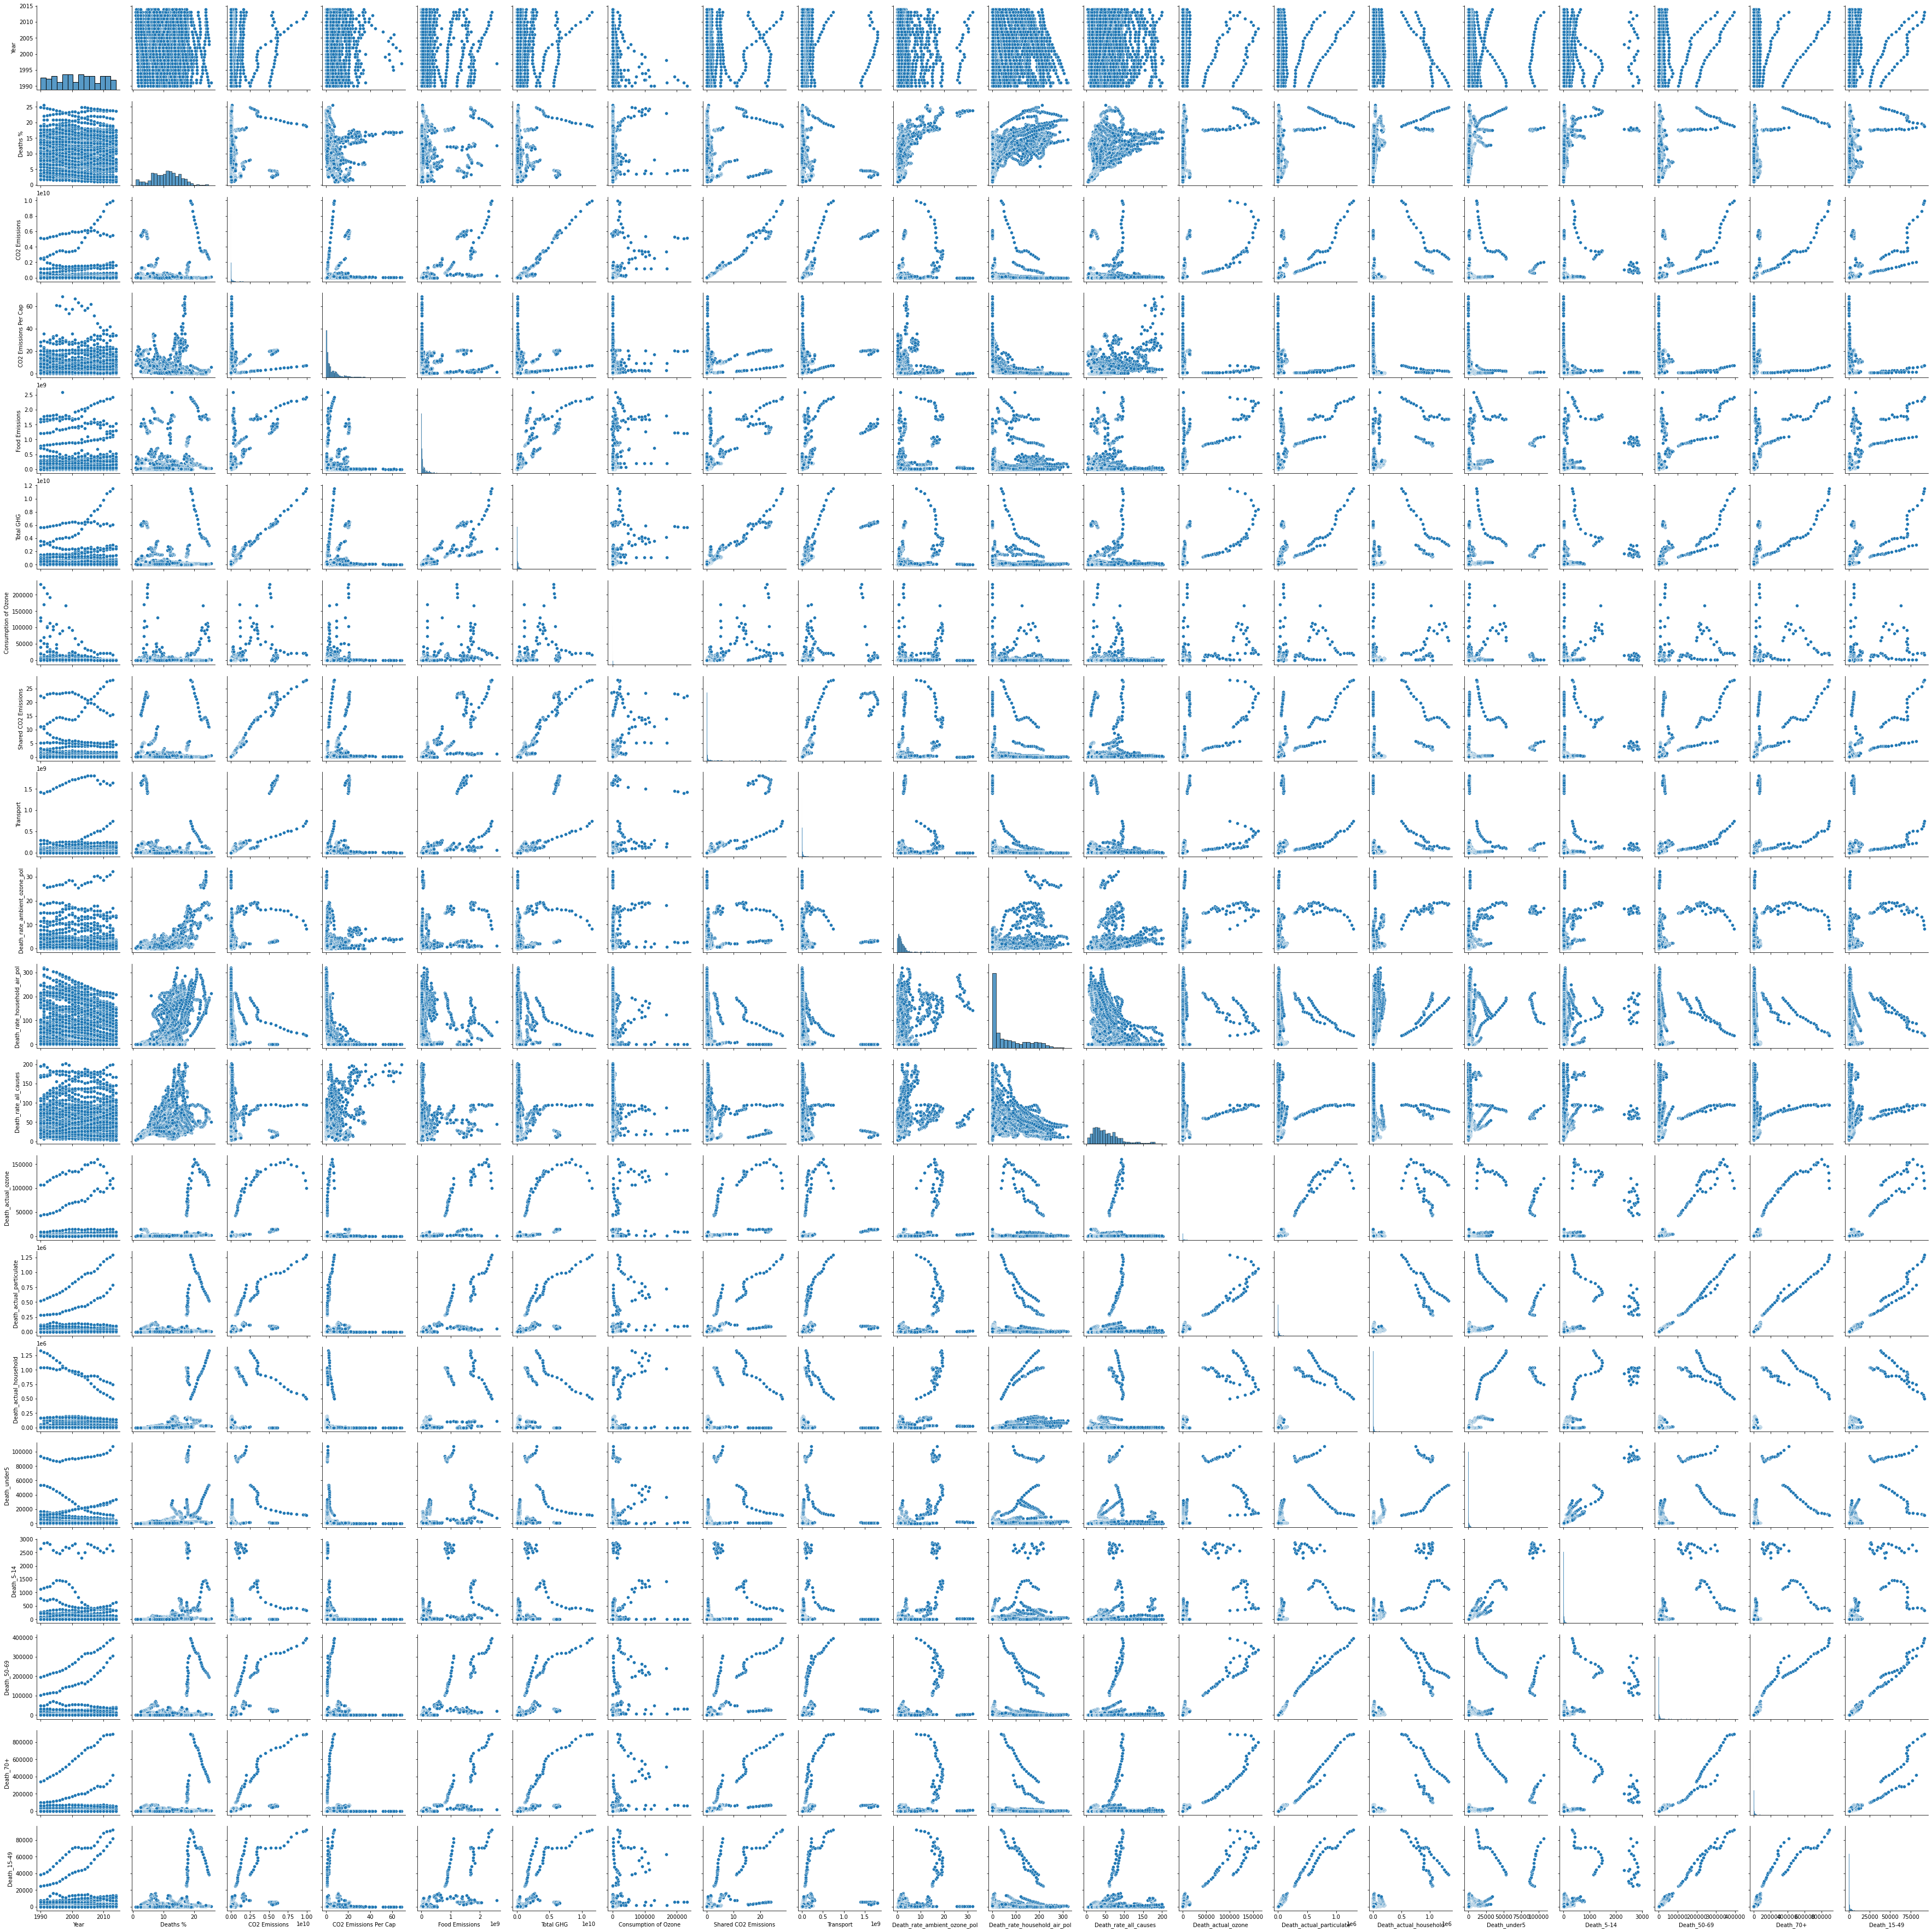

In [37]:
sns.pairplot(df)

In [38]:
df.corr()

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
Year,1.000000,-0.034864,0.034179,-0.005093,0.009182,0.035907,-0.159039,-0.006780,0.027781,-0.026598,-0.093005,0.002737,0.013554,0.036676,-0.036352,-0.015397,-0.022633,0.032609,0.037909,0.045024
Deaths %,-0.034864,1.000000,-0.024582,-0.203922,0.045427,-0.012305,0.025220,-0.028540,-0.162498,0.579917,0.620455,0.419090,0.257881,0.234923,0.332869,0.276998,0.277982,0.240607,0.211778,0.251256
CO2 Emissions,0.034179,-0.024582,1.000000,0.178307,0.706937,0.970737,0.488008,0.986830,0.841720,0.228964,-0.099008,0.006315,0.647705,0.714213,0.415573,0.230522,0.235448,0.688662,0.742225,0.655781
CO2 Emissions Per Cap,-0.005093,-0.203922,0.178307,1.000000,-0.004039,0.136319,0.076371,0.186333,0.219556,-0.025151,-0.463902,0.362277,-0.031076,-0.025094,-0.110508,-0.115412,-0.109011,-0.026868,-0.008065,-0.039870
Food Emissions,0.009182,0.045427,0.706937,-0.004039,1.000000,0.835498,0.427005,0.705334,0.560457,0.239412,0.055374,-0.081347,0.620510,0.659767,0.557916,0.404670,0.391339,0.659611,0.642469,0.662159
Total GHG,0.035907,-0.012305,0.970737,0.136319,0.835498,1.000000,0.485066,0.958056,0.804186,0.232971,-0.061113,-0.013891,0.656978,0.737085,0.461414,0.287597,0.286015,0.719043,0.749092,0.697427
Consumption of Ozone,-0.159039,0.025220,0.488008,0.076371,0.427005,0.485066,1.000000,0.571695,0.392638,0.185312,-0.028308,0.004151,0.426646,0.398966,0.381795,0.208376,0.221737,0.400916,0.407225,0.377866
Shared CO2 Emissions,-0.006780,-0.028540,0.986830,0.186333,0.705334,0.958056,0.571695,1.000000,0.857859,0.233218,-0.097407,0.003768,0.635410,0.683873,0.427150,0.238950,0.245202,0.663760,0.708908,0.629464
Transport,0.027781,-0.162498,0.841720,0.219556,0.560457,0.804186,0.392638,0.857859,1.000000,0.067577,-0.134781,-0.077755,0.254648,0.285002,0.111812,0.076050,0.070937,0.275649,0.298222,0.254894
Death_rate_ambient_ozone_pol,-0.026598,0.579917,0.228964,-0.025151,0.239412,0.232971,0.185312,0.233218,0.067577,1.000000,0.297376,0.264714,0.495123,0.441772,0.533372,0.483805,0.471056,0.458814,0.404883,0.457901


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [44]:
df['Entity']

0        Albania
1        Albania
2        Albania
3        Albania
4        Albania
          ...   
2653    Zimbabwe
2654    Zimbabwe
2655    Zimbabwe
2656    Zimbabwe
2657    Zimbabwe
Name: Entity, Length: 2658, dtype: object

In [46]:
X = df
X_dum = pd.get_dummies(df, columns=['Entity'], drop_first=True)

In [47]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_dum)

In [48]:
dbs = DBSCAN()
dbs.fit(X_scaled)

DBSCAN()

In [49]:
dbs.labels_

array([ -1,   0,   0, ..., 136, 136, 136], dtype=int64)

In [50]:
silhouette_score(X_scaled, dbs.labels_)

0.6658000861465628

In [57]:
def find_best_silhouette(df):
    
    max_score = -1
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    
    for epsilon in np.linspace(.2, 5, 30):
        for minsamples in range(2, 6):
            dbscan = DBSCAN(eps=epsilon, min_samples=minsamples, n_jobs=-1)
            dbscan.fit(df_scaled)
            if len(set(dbscan.labels_))>1:
                score = silhouette_score(df_scaled, dbscan.labels_)
                if score > max_score:
                    max_score = score
                    best_eps = epsilon
                    best_minsamples = minsamples
                    
    print(f'Best silhouette score was {max_score}')
    print(f'Best eps was {best_eps}')
    print(f'Best min_samples was {best_minsamples}')
    return

In [58]:
find_best_silhouette(X_dum)

Best silhouette score was 0.8735005109724351
Best eps was 3.013793103448276
Best min_samples was 2
